# Data Cleaning

### Setup

Please find link to dataset: https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset/code

Dependencies installation checklist :
 - Pandas
 - Matplotlib
 - Seaborn
 - Numpy
 - Scikit (model training)

In [43]:
!pip install pandas matplotlib seaborn numpy scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Define imports:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Load dataset and confirm 

In [45]:
df = pd.read_csv("../data/stroke_risk_dataset.csv")

df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [46]:
print("Total dataset count: ", df.shape[0])

Total dataset count:  70000


In [47]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


## EDA & Data Cleaning


Goal for this step is to basically figure out if we can trust this data set.

Target approach:
- Check for any null values in all the columns
- Check for any duplicates and drop them if they exist
- Make sure we don't have any incorrect data types
- Perform some correlation analysis
- Spot outliers

In [48]:
print(df.isnull().sum())

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


As expected we have no null values throughout dataset but good to confirm

In [49]:
print('duplicate rows: ',  df.duplicated().sum())

duplicate rows:  1021


Can deduce from this 1,021 duplicate rows in our dataset. We definitely need to drop these values because we are NOT working with time series input and we want unique patient profiles. They can add noise when trying to make predictions too if we do not drop them!

In [50]:
df = df.drop_duplicates()
print('duplicate rows: ',  df.duplicated().sum())

duplicate rows:  0


In [51]:
df.dtypes

Chest Pain                          int64
Shortness of Breath                 int64
Irregular Heartbeat                 int64
Fatigue & Weakness                  int64
Dizziness                           int64
Swelling (Edema)                    int64
Pain in Neck/Jaw/Shoulder/Back      int64
Excessive Sweating                  int64
Persistent Cough                    int64
Nausea/Vomiting                     int64
High Blood Pressure                 int64
Chest Discomfort (Activity)         int64
Cold Hands/Feet                     int64
Snoring/Sleep Apnea                 int64
Anxiety/Feeling of Doom             int64
Age                                 int64
Stroke Risk (%)                   float64
At Risk (Binary)                    int64
dtype: object

Perfect datatype consistency across dataset and seems fine to keep it as is.

Last step would be outlier analysis. The columns that would make sense to analyse are:
- Age
- Stroke Risk (%)

### Correlation Analysis

Pretty straightforward process for us when using pandas, just need to leverage the corr() function and map it using seaborn and a heat map so that we can do one entire correlation comparison.

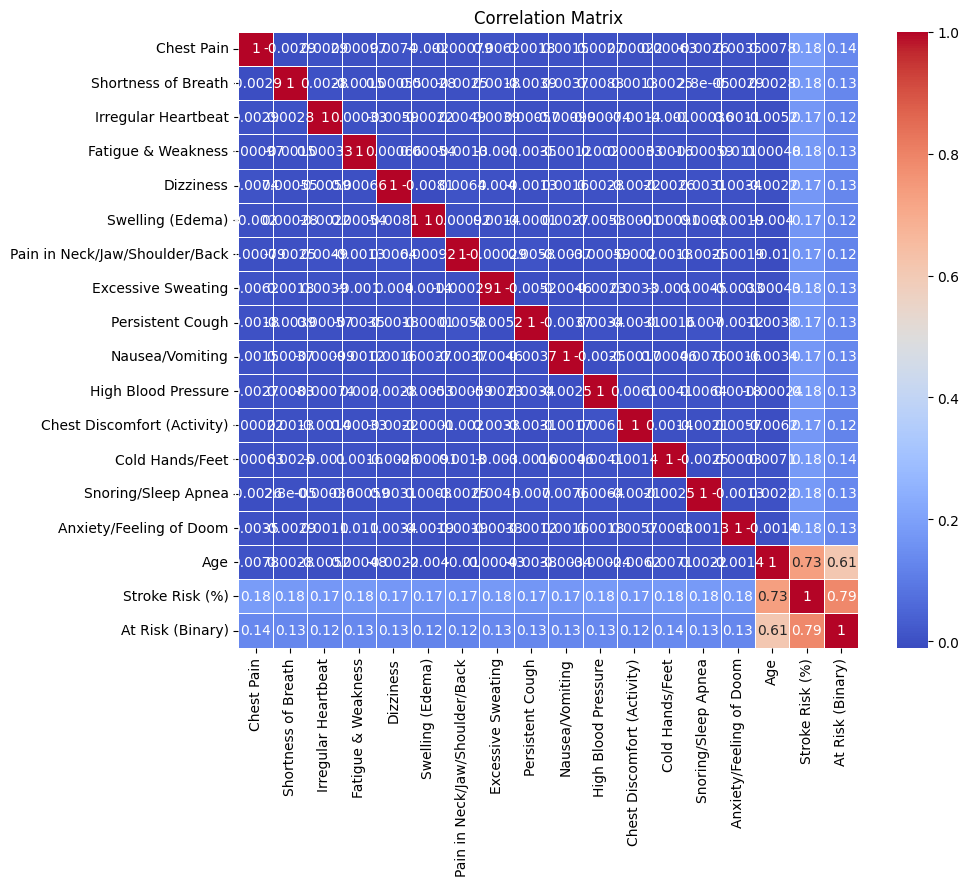

In [52]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Alright, pretty much makes sense here looking at the bottom right corner and confirms we are interested in further analysing: Age, Stroke risk percentage, and at risk binary. 

We also see close to almost no correlation on all the other values. This confirms what we will be doing outlier analysis on what we are going to be testing our model against.

### Outlier Age Analysis 

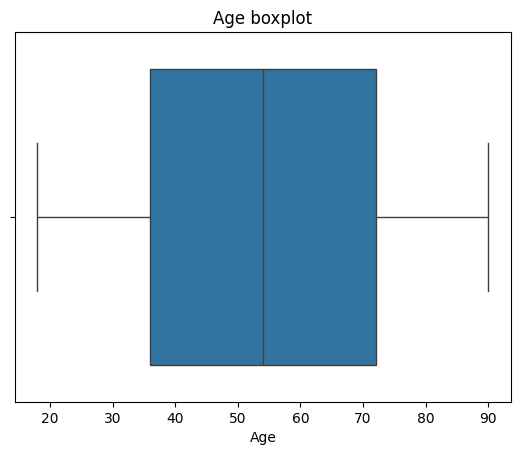

In [53]:
sns.boxplot(x=df['Age'])
plt.title("Age boxplot")
plt.show()

In [54]:
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f"Age range: {age_min} to {age_max} years")

Age range: 18 to 90 years


In [55]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

if outliers.empty:
 print("No outliers found")
else:
  print(f"Outliers found: {len(outliers)}")
  print(outliers[['Age']])

No outliers found


### Outlier Stroke Risk (%) Anaylsis

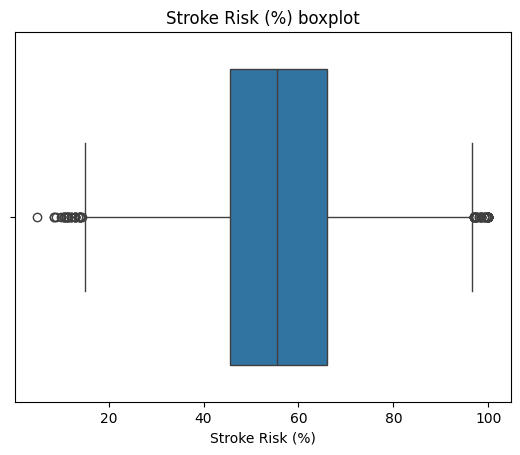

In [56]:
sns.boxplot(x=df['Stroke Risk (%)'])
plt.title("Stroke Risk (%) boxplot")
plt.show()

In [57]:
risk_min = df['Stroke Risk (%)'].min()
risk_max = df['Stroke Risk (%)'].max()
print(f"Stroke Risk range: {risk_min:.2f}% to {risk_max:.2f}%")

Stroke Risk range: 5.00% to 100.00%


In [58]:
Q1 = df['Stroke Risk (%)'].quantile(0.25)
Q3 = df['Stroke Risk (%)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Stroke Risk (%)'] < lower_bound) | (df['Stroke Risk (%)'] > upper_bound)]

if outliers.empty:
 print("No outliers found")
else:
 print(f"Outliers found: {len(outliers)}")
 print(outliers[['Stroke Risk (%)']])
 

Outliers found: 70
       Stroke Risk (%)
2498             100.0
6423              98.5
8544              98.0
8772             100.0
8962              97.5
...                ...
58128             97.0
61361             13.0
64253             13.0
65189             99.5
68195             11.5

[70 rows x 1 columns]


Looks like we have some outliers in the Stroke Risk percentage column, 70 outliers to be precise. We can bascially interpret these values as cases where patients where either at extremely high risk in the upper percentile and vice versa for the lower percentile. 

Does this mean that we should drop these outlier? No, these cases could actually be medically valid and could/will actually play an important role in our predictions later on and therefore should be accounted for.

<Axes: xlabel='Stroke Risk (%)', ylabel='Count'>

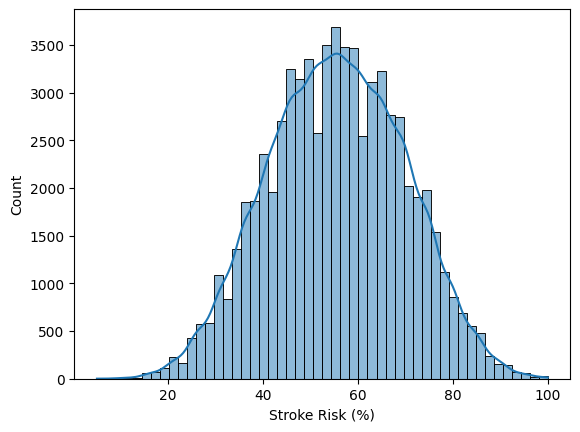

In [59]:
sns.histplot(df['Stroke Risk (%)'], bins=50, kde=True)

*Normal distribution*

Before we conclude that not dropping the outliers is good idea on the stroke risk column, we can do a further check to see if they are actually valid to not drop by comparing them against the at risk binary column.

Obviously if the outlier in the higher range does has any rows where the At risk != 1, that is a problem, and vice versa for the lower percentile so at risk 1= 0. 

Why? Because then the data does not make sense that you have a stroke risk higher than 95% but the at risk value shows 0 which means not at risk.

In [60]:
print(df[df['Stroke Risk (%)'] > 95]['At Risk (Binary)'].value_counts())

At Risk (Binary)
1    73
Name: count, dtype: int64


In [61]:
print(df[df['Stroke Risk (%)'] < 15]['At Risk (Binary)'].value_counts())

At Risk (Binary)
0    32
Name: count, dtype: int64


Yes, both show what we want, all upper percentile outliers show at risk of 1 and vice versa with < 15% having a values of 0.

## Model Training

Before we get into training different models, it is important to outline what we are actaully training for since that will decide what models we want to try out. Simply put we have two things we want to predict:

1. What is the predicted stroke risk of this person as a percentage value so 0-100%

2. What is the predicted stroke risk in binary of this person so 0 or 1. 0 = not at risk & 1 = at risk

This means we are looking at both classification AND regression scenarios for optimal results but for this project we will only be focusing on regression as we wish to predict the stroke risk percentage. 

When looking into what model we believe that it is important to choose the correct models based on the total dataset count. We have a total of 70,000 patients in the original data where we dropped 1,021 of them due to duplicates so can safely say we have:

In [62]:
print("Total dataset count: ", df.shape[0])

Total dataset count:  68979


Ok, lets just say 70,000 for the sake of choosing the model. Since we are well beyond 10,000 rows, we can classify this to lets say a fairly medium to large size data set with it being more on the larger size. We think it is safe to say that 100k+ can be considered as a large set so lets also train against those models just in case.

I'm going to categorize the main ones and put them into three values based on the data size: Small, Medium, Large

#### Regression
- Linear Regression: Well ... y=mx+b. (Medium, Large) 

- Random Forest Regressor: RFC but for regression. Best for capturing non-linear relationships. (Medium)

- Gradient Boosting Regressors (XGBoost, LightGBM, etc...): Works very well for many regression problems. (Large)

#### Classification
- Logistic Regression: Good for binary classification problems. (Small)

- Random Forest Classifier: Powerful tree-based model that works well for both small and large datasets, quite often the go to. (Small)

- Gradient Boosting Machines (XGBoost, LightGBM, etc...): Typically outperform random forests for many structured datasets. (Medium)

- Support Vector Machine (SVM): SVMs for when when there is margin of separation in the data. (Medium)

- K-Nearest Neighbors (KNN): Simple model that can perform well if the data has a clear cluster structure. (Small)

- Neural Networks: Can be effective for complex, high-dimensional data, but generally used with MASSIVE datasets. (Large)


Therefore, from that analysis, we decided to experiment with:

Regression (Stroke risk (%)): 
- Random Forest Regression
- Gradient Boost Regression
- Linear Regression


### Regression

First prepare dataset for training:

In [ ]:
scaler = MinMaxScaler()
df['Age_Scaled'] = scaler.fit_transform(df[['Age']])
X = df.drop(columns=['Age'])

In [ ]:
from sklearn.model_selection import train_test_split

# Target & Drop for data leakage prevention
y = df['Stroke Risk (%)']
X = df.drop(columns=['Stroke Risk (%)', 'At Risk (Binary)'])

# Split the data into training (80%) and test (20%) using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training (80%) and validation (20%) using stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)


print("Random Forest Regression:")
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R²:", r2_score(y_test, rf_predictions))

print("\nGradient Boosting Regression:")
print("MSE:", mean_squared_error(y_test, gb_predictions))
print("R²:", r2_score(y_test, gb_predictions))

print("\nLinear Regression:")
print("MSE:", mean_squared_error(y_test, lr_predictions))
print("R²:", r2_score(y_test, lr_predictions))

mse_scorer = make_scorer(mean_squared_error)

rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring=mse_scorer)
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring=mse_scorer)
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring=mse_scorer)

print("\nRandom Forest CV MSE Scores:", rf_cv_scores)
print("Random Forest CV Mean MSE:", rf_cv_scores.mean())

print("\nGradient Boosting CV MSE Scores:", gb_cv_scores)
print("Gradient Boosting CV Mean MSE:", gb_cv_scores.mean())

print("\nLinear Regression CV MSE Scores:", lr_cv_scores)
print("Linear Regression CV Mean MSE:", lr_cv_scores.mean())

Random Forest Regression:
MSE: 8.052485350826327
R²: 0.9600521835283989

Gradient Boosting Regression:
MSE: 3.834790180245925
R²: 0.9809758741986607

Linear Regression:
MSE: 0.0023529531584754178
R²: 0.999988327163994

Random Forest CV MSE Scores: [9.20032667 9.09014994 9.34128855 9.04204865 9.0652886 ]
Random Forest CV Mean MSE: 9.147820483029324

Gradient Boosting CV MSE Scores: [3.94060177 4.00010897 4.05344088 4.02261439 3.91976167]
Gradient Boosting CV Mean MSE: 3.987305536144414

Linear Regression CV MSE Scores: [8.57912006e-07 8.70331893e-07 4.07644945e-03 2.82636363e-04
 8.21586119e-07]
Linear Regression CV Mean MSE: 0.0008723271283726899


Linear regression seems unrealistically too accurate and we can tell it is overfitting and the cross validation confirms this. Under these circumstances, Gradient Boost is the choice to go with having a higher accuracy compared to the Random Forest Regression.

### Hyper Parameter Tuning 

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE (Negative):", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

print("\nBest Gradient Boosting Model Evaluation on Test Data:")
print("MSE:", mean_squared_error(y_test, test_predictions))
print("R²:", r2_score(y_test, test_predictions))

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


KeyboardInterrupt: 